In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys

from SPEconverter import import_spectra
from arrayDef import background_array, background_spectra, bgo_array, bgo_spectra

import becquerel as bq
from becquerel import SpectrumPlotter as sp
from lmfit.models import ExponentialModel, GaussianModel

import warnings
warnings.filterwarnings("ignore")

### Import the spectra from SpecTcl into .spe files

In [2]:
runnum= 'run216'
bgrun = 'run219'
#livetime= 301
size= 10923

### Examine all spectra

First import the .spe files for each BGO

In [3]:
for item in bgo_array:
    bgo_spectra[item]= bq.Spectrum.from_file(f'./{runnum}/{runnum}_{item}.spe')
    #bgo_spectra[item].livetime= livetime
    background_spectra[item]= bq.Spectrum.from_file(f'./{bgrun}/{bgrun}_{item}.spe')
    #background_spectra.livetime = livetime

SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID00.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID00.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID01.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID01.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID02.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID02.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID03.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID03.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID04.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID04.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID05.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID05.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID06.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID06.spe
SpeFile: Reading file ./run216/run216_BGO_ModID00_ChID07.spe
SpeFile: Reading file ./run219/run219_BGO_ModID00_ChID07.spe
SpeFile: Reading file ./

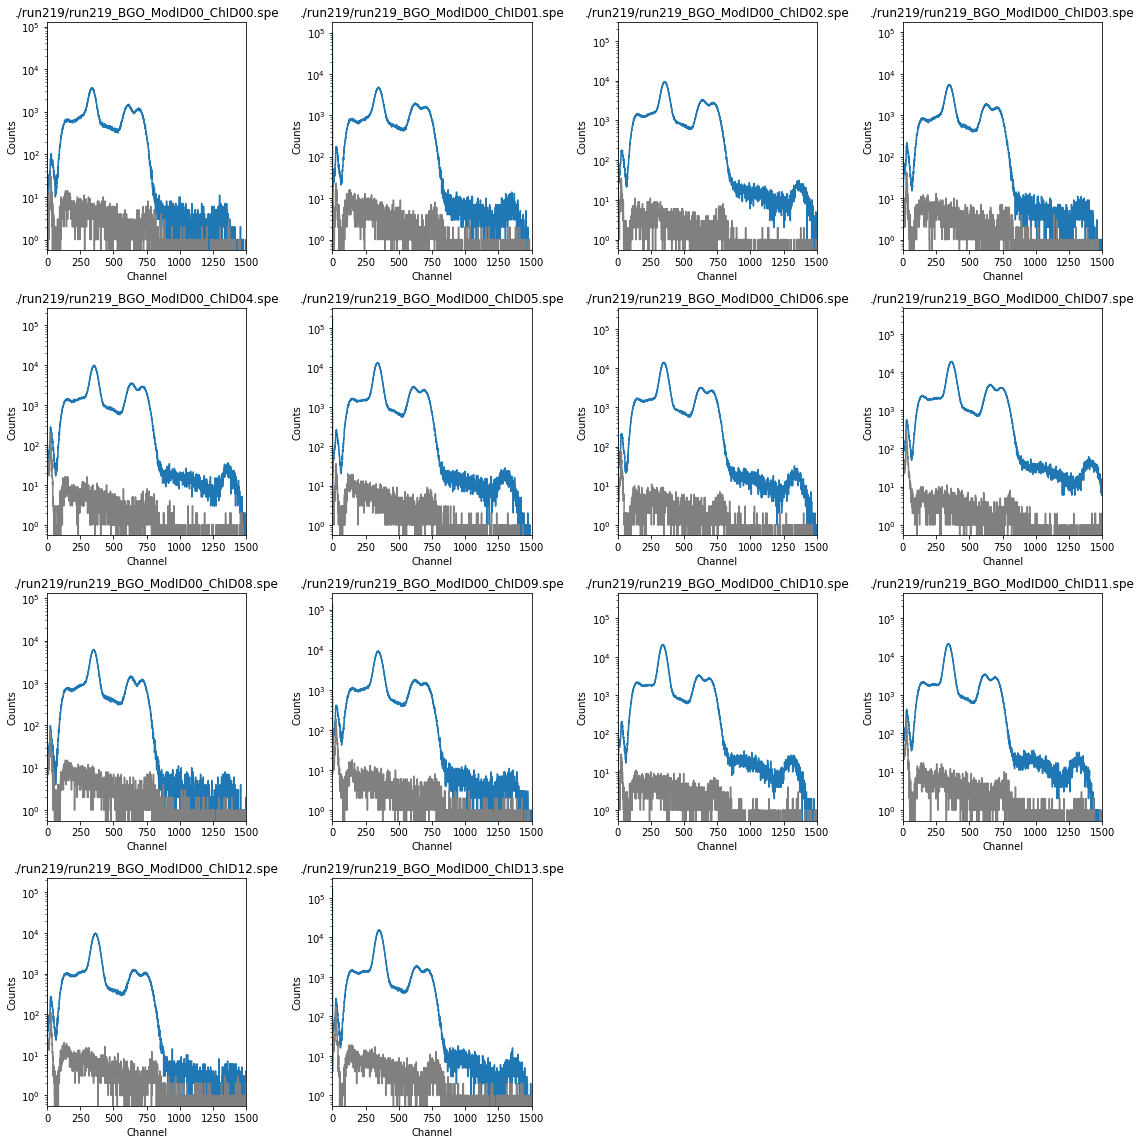

In [4]:
fig = plt.figure(figsize=(16,16))
grid = plt.GridSpec(4, 4)

subtracted_spectra= {}

for i, item in enumerate(bgo_spectra):
    ax = fig.add_subplot(4, 4, i+1)
    bgo_spectra[item].plot(xmode='channel', yscale='log', ax= ax, label= "Raw")
    background_spectra[item].plot(xmode='channel', yscale='log', ax= ax, color="gray", label= "BG")

    plt.xlim(0,1500)
    #plt.ylim(-1,24)
plt.tight_layout()

In [5]:
#fit various gaussian peaks in spectrum
#staring witjh 662 keV
#select channel region with peak of interest
xmin= 250
xmax= 950

spec= bgo_spectra['BGO_ModID00_ChID10']
y= spec.counts_vals[xmin:xmax]
x= spec.channels[xmin:xmax]


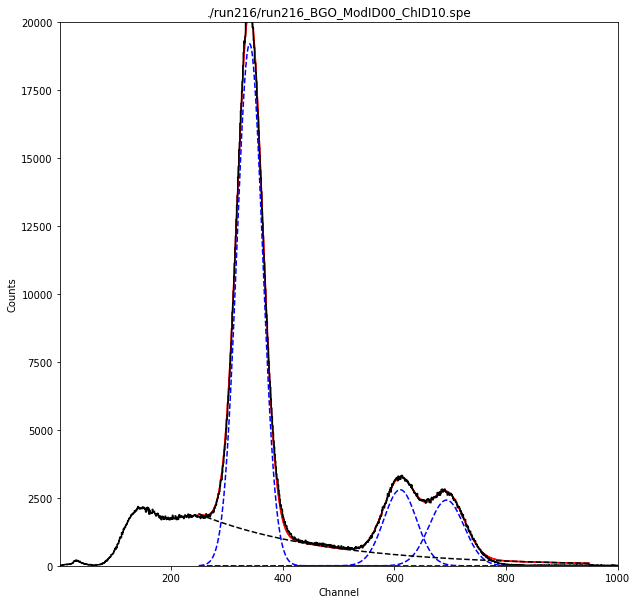

In [6]:
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(380, min=150, max=450)
pars['g1_sigma'].set(15, min=3)
pars['g1_amplitude'].set(20000, min=500)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(650, min=500, max=700)
pars['g2_sigma'].set(15, min=3)
pars['g2_amplitude'].set(5000, min=100)

gauss3 = GaussianModel(prefix='g3_')

pars.update(gauss3.make_params())

pars['g3_center'].set(710, min=650, max=850)
pars['g3_sigma'].set(15, min=3)
pars['g3_amplitude'].set(4000, min=100)


mod = gauss1 + exp_mod + gauss2 + gauss3

init = mod.eval(pars, x=x)

out = mod.fit(y, pars, x=x)
#print(out.fit_report(min_correl=0.5))

plot_components = True

fig, ax=plt.subplots(figsize=(10,10))
#ax.plot(x, y, 'b')
#plt.plot(x, init, 'k--')
ax.plot(x, out.best_fit, 'r-')
ax.plot(x, out.best_fit, 'r-')
spec.plot(color='black', ax= ax)

if plot_components:
    comps = out.eval_components(x=x)
    ax.plot(x, comps['g1_'], 'b--')
    plt.plot(x, comps['g2_'], 'b--')
    plt.plot(x, comps['g3_'], 'b--')
    plt.plot(x, comps['exp_'], 'k--')

ax.set_xlim(1,1000)
ax.set_ylim(0, 20000)
ax.set_yscale('linear')
plt.show()

In [7]:
centers_662= {}
centers_1173= {}
centers_1332= {}

In [8]:
for item in bgo_spectra:
    spec= bgo_spectra[item]
    y= spec.counts_vals[xmin:xmax]
    x= spec.channels[xmin:xmax]
    
    exp_mod = ExponentialModel(prefix='exp_')
    pars = exp_mod.guess(y, x=x)
    
    gauss1 = GaussianModel(prefix='g1_')
    pars.update(gauss1.make_params())
    
    pars['g1_center'].set(380, min=280, max=450)
    pars['g1_sigma'].set(15, min=3)
    pars['g1_amplitude'].set(20000, min=500)
    
    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())
    
    pars['g2_center'].set(615, min=550, max=650)
    pars['g2_sigma'].set(15, min=3)
    pars['g2_amplitude'].set(5000, min=100)
    
    gauss3 = GaussianModel(prefix='g3_')
    
    pars.update(gauss3.make_params())
    
    pars['g3_center'].set(710, min=680, max=800)
    pars['g3_sigma'].set(15, min=3)
    pars['g3_amplitude'].set(4000, min=100)
    
    mod = gauss1 + exp_mod + gauss2 + gauss3
    
    init = mod.eval(pars, x=x)
    
    out = mod.fit(y, pars, x=x)
    #print(out.fit_report(min_correl=0.5))
    centers_662[item]= out.params['g1_center'].value
    centers_1173[item]= out.params['g2_center'].value
    centers_1332[item]= out.params['g3_center'].value
    '''
    plot_components = True
    
    fig, ax=plt.subplots(figsize=(10,10))
    #ax.plot(x, y, 'b')
    #plt.plot(x, init, 'k--')
    ax.plot(x, out.best_fit, 'r-')
    ax.plot(x, out.best_fit, 'r-')
    spec.plot(color='black', ax= ax)
    
    if plot_components:
        comps = out.eval_components(x=x)
        ax.plot(x, comps['g1_'], 'b--')
        plt.plot(x, comps['g2_'], 'b--')
        plt.plot(x, comps['g3_'], 'b--')
        plt.plot(x, comps['exp_'], 'k--')
    
    ax.set_xlim(1,1000)
    ax.set_ylim(0, 20000)
    ax.set_yscale('linear')
    plt.show()
    '''

In [9]:
import pprint
# Prints the nicely formatted dictionary
pprint.pprint(centers_662)
pprint.pprint(centers_1173)
pprint.pprint(centers_1332)

{'BGO_ModID00_ChID00': 338.8145706492028,
 'BGO_ModID00_ChID01': 347.98611478649343,
 'BGO_ModID00_ChID02': 355.1590889536441,
 'BGO_ModID00_ChID03': 349.4771838843546,
 'BGO_ModID00_ChID04': 354.31132034307836,
 'BGO_ModID00_ChID05': 341.1251473713099,
 'BGO_ModID00_ChID06': 348.43653157812145,
 'BGO_ModID00_ChID07': 365.2165217115861,
 'BGO_ModID00_ChID08': 350.9262431965599,
 'BGO_ModID00_ChID09': 346.0913072209256,
 'BGO_ModID00_ChID10': 340.8449709086572,
 'BGO_ModID00_ChID11': 342.8465481640882,
 'BGO_ModID00_ChID12': 364.58428002280357,
 'BGO_ModID00_ChID13': 352.73944056250616}
{'BGO_ModID00_ChID00': 609.9665205398763,
 'BGO_ModID00_ChID01': 624.6706938705227,
 'BGO_ModID00_ChID02': 637.7076649373814,
 'BGO_ModID00_ChID03': 627.8643131371439,
 'BGO_ModID00_ChID04': 635.6787109574482,
 'BGO_ModID00_ChID05': 610.9829015225345,
 'BGO_ModID00_ChID06': 625.1290517616984,
 'BGO_ModID00_ChID07': 649.9999999844,
 'BGO_ModID00_ChID08': 631.027090462312,
 'BGO_ModID00_ChID09': 621.014050

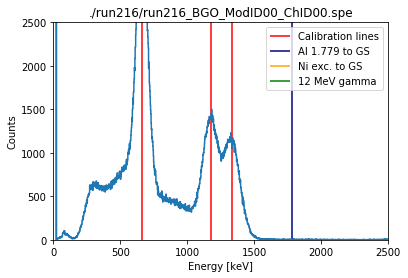

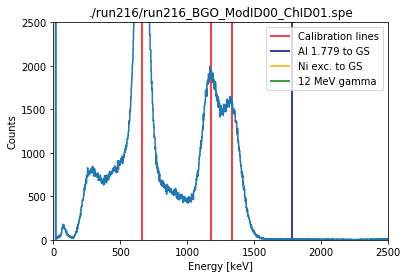

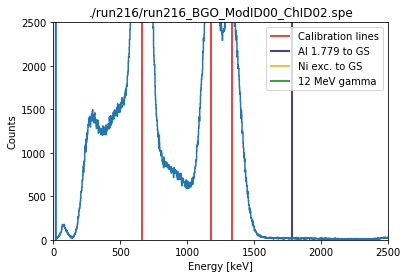

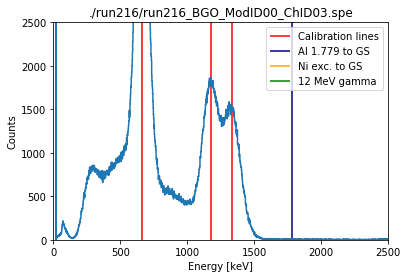

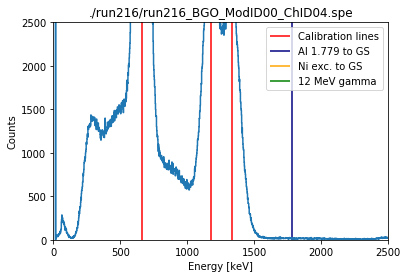

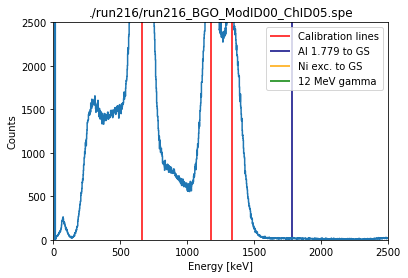

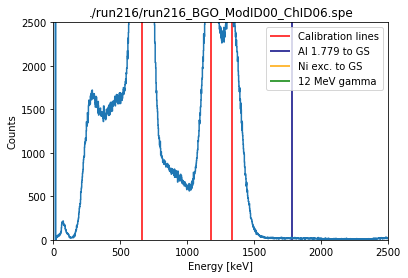

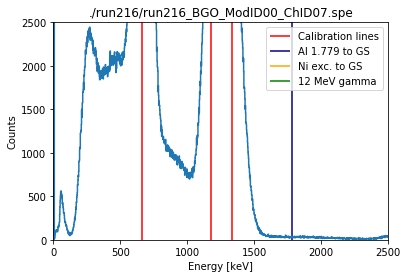

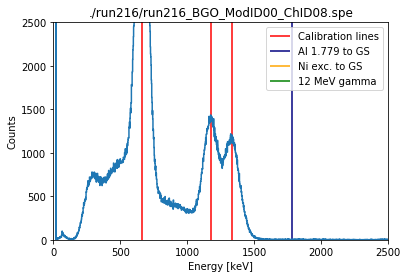

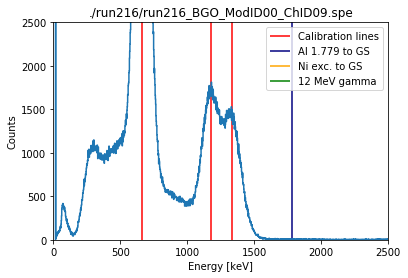

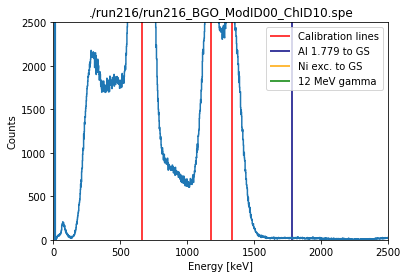

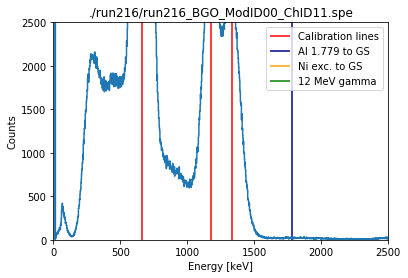

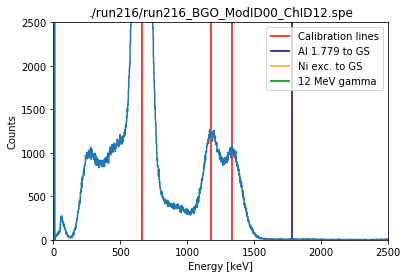

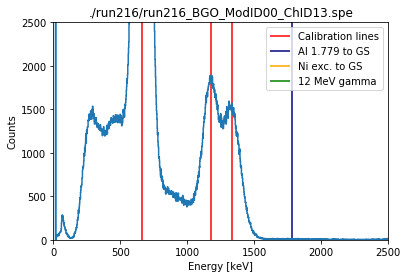

In [10]:
calibration= {}

for item in bgo_spectra:
    spec= bgo_spectra[item]
    energies = [661.657, 1173.228, 1332.501]
    channels = [centers_662[item], centers_1173[item], centers_1332[item]]
    
    calibration[item] = bq.LinearEnergyCal.from_points(channels, energies)
    #print(calibration[item].coeffs)

    spec.apply_calibration(calibration[item])
    spec.is_calibrated

    spec.plot(xmode='energy', yscale='linear')
    plt.vlines(energies, *plt.gca().get_ylim(), color='red', label='Calibration lines')
    plt.vlines([1779], *plt.gca().get_ylim(), color='navy', label='Al 1.779 to GS')
    plt.vlines([5227], *plt.gca().get_ylim(), color='orange', label='Ni exc. to GS')
    plt.vlines([12000], *plt.gca().get_ylim(), color='green', label='12 MeV gamma')
    plt.legend();
    plt.ylim(0,2500)
    plt.xlim(0,2500)
    

In [25]:
calibration['BGO_ModID00_ChID00'].coeffs
# kev= b*ch + c

{'b': 1.8884391958950268, 'c': 21.733919274232385}

In [56]:
f= open("calibration", "w")
for item in calibration:
    #f.write(f"{item}: ")
    f.write(str(calibration[item].coeffs['b'])+'\t'+str(calibration[item].coeffs['c'])+'\n')
f.close()